<a href="https://colab.research.google.com/github/sergio-cabrales/python/blob/main/MasterSemana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use ('fivethirtyeight')

In [ ]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2000-01-01', end='2021-02-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.860883
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.788302
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.799837
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.730621
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.765229
...,...,...,...,...,...,...
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998


In [ ]:
df['log_ret'] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))
df

,High,Low,Open,Close,Volume,Adj Close,log_ret
Date,,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.860883,NaN
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.788302,-0.088077
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.799837,0.014527
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.730621,-0.090514
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.765229,0.046281
...,...,...,...,...,...,...,...
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001,-0.001112
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998,-0.004060
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998,-0.035402


In [ ]:
# Num rows and colums
df.shape

(5323, 7)

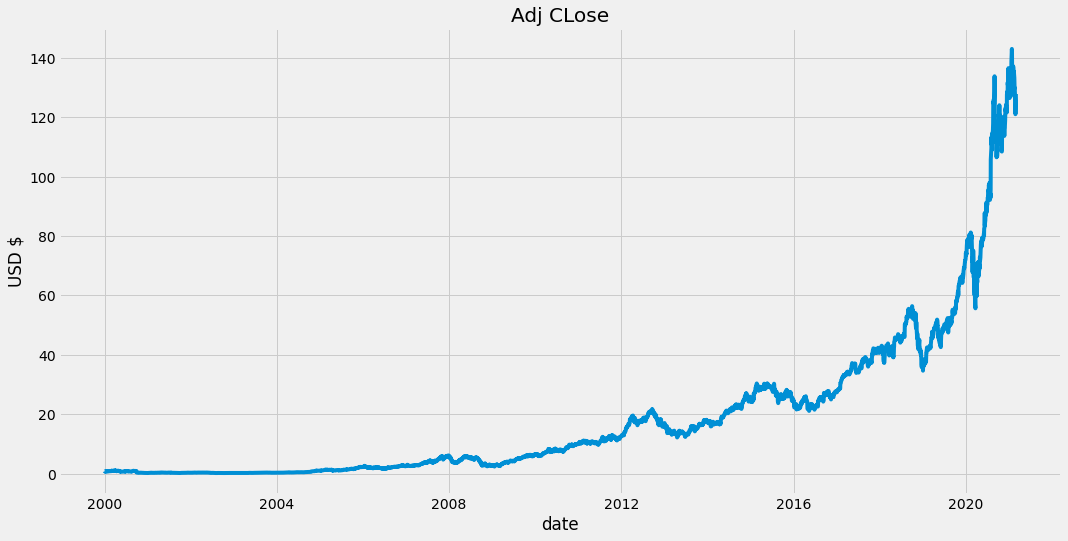

In [ ]:
plt.figure(figsize=(16,8))
plt.title ('Adj CLose')
plt.plot(df['Adj Close'])
plt.xlabel('date')
plt.ylabel('USD $')
plt.show()

In [ ]:
# creat a new dataframe
data = df.filter(['Adj Close'])
# numpy array
dataset = data.values

training_len = math.ceil(len(dataset)*0.98)

training_len

5217

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00461718],
       [0.00410871],
       [0.00418952],
       ...,
       [0.84618403],
       [0.84807555],
       [0.89382158]])

In [ ]:
# Create trainig data set
train_data = scaled_data[0:training_len, :]

x_train = []
y_train = []

for i in range(20, len(train_data)):
  x_train.append(train_data[i-20:i,0])
  y_train.append(train_data[i,0])
  if i <= 20:
    print(x_train)
    print(y_train)
    print()

[array([0.00461718, 0.00410871, 0.00418952, 0.00370462, 0.00394708,
       0.00385279, 0.0035834 , 0.00328371, 0.00379891, 0.00399758,
       0.00418616, 0.00432759, 0.00470137, 0.00458351, 0.00431075,
       0.00463402, 0.00452289, 0.00451279, 0.00406157, 0.00417605])]
[0.00398748335990166]



In [ ]:
# x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# reshape tha data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(5197, 20, 1)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Trian the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

5197/5197 [==============================] - 47s 9ms/step - loss: 8.1310e-04


In [ ]:
# Create the tsting data set
test_data = scaled_data[training_len - 20: , :]

x_test =[]
y_test = dataset[training_len:,:]
for i in range(20, len(test_data)):
  x_test.append(test_data[i-20:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the roor mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

3.57704064425365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


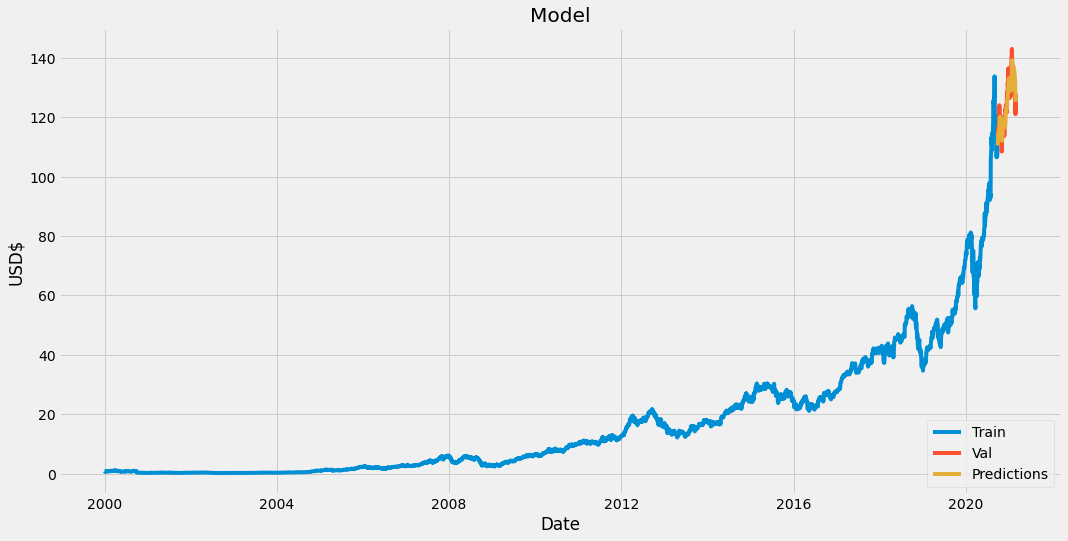

In [ ]:
# Plot the data
train =data[:training_len]
valid = data[training_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('USD$')
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()


In [ ]:
# Show prices
valid

,Adj Close,Predictions
Date,,
2020-09-28,114.590767,110.463852
2020-09-29,113.723564,111.451920
2020-09-30,115.438042,112.367325
2020-10-01,116.414894,113.392937
2020-10-02,112.657005,114.434143
...,...,...
2021-02-23,125.860001,130.677841
2021-02-24,125.349998,129.356384
2021-02-25,120.989998,128.219955


In [ ]:
# Get the qoute
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2020-01-01', end='2021-03-08')
# new data frame
new_df = apple_quote.filter(['Adj Close'])
# last 60 days
last_60_days = new_df[-20:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[121.994606]]


In [ ]:
pred_price

array([[121.994606]], dtype=float32)

In [ ]:
# Get the qoute
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-03-09', end='2021-03-09')
print(apple_quote2['Adj Close'])

Date
2021-03-09    121.089996
Name: Adj Close, dtype: float64
